In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.utils import plot_model

In [2]:
print(tf.__version__)
print(np.__version__)

2.13.0
1.24.3


In [3]:
array_X = np.arange(-7, 20, 3)
array_y = np.arange(3, 30 , 3)

array_X, array_y

(array([-7, -4, -1,  2,  5,  8, 11, 14, 17]),
 array([ 3,  6,  9, 12, 15, 18, 21, 24, 27]))

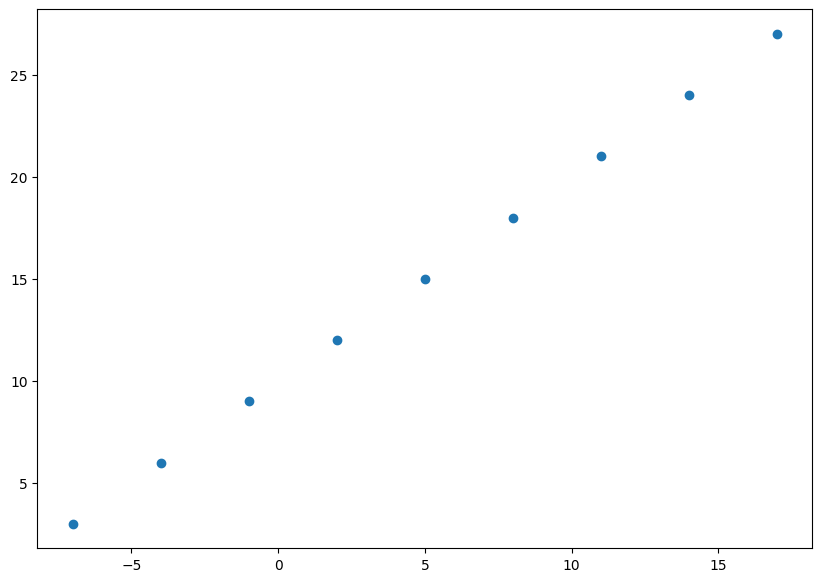

In [4]:
plt.figure(figsize=(10,7))
plt.scatter(array_X, array_y);

In [5]:
X = tf.constant(array_X)
y = tf.constant(array_y)

X, y

(<tf.Tensor: shape=(9,), dtype=int64, numpy=array([-7, -4, -1,  2,  5,  8, 11, 14, 17])>,
 <tf.Tensor: shape=(9,), dtype=int64, numpy=array([ 3,  6,  9, 12, 15, 18, 21, 24, 27])>)

In [6]:
tf.random.set_seed(42)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(50, activation = None),
    tf.keras.layers.Dense(1)
])

model.compile(loss = tf.keras.losses.mse,
             optimizer = tf.keras.optimizers.Adam(learning_rate = 0.01),
             metrics=["mae"])

model.fit(tf.expand_dims(X, axis = -1), y, epochs = 100, verbose = 1)

Epoch 1/100
1/1 [==============================] - 1s 801ms/step - loss: 261.7202 - mae: 14.5565
Epoch 2/100
1/1 [==============================] - 0s 8ms/step - loss: 217.2460 - mae: 13.5862
Epoch 3/100
1/1 [==============================] - 0s 8ms/step - loss: 178.0740 - mae: 12.6104
Epoch 4/100
1/1 [==============================] - 0s 7ms/step - loss: 144.3528 - mae: 11.6311
Epoch 5/100
1/1 [==============================] - 0s 7ms/step - loss: 116.2253 - mae: 10.6519
Epoch 6/100
1/1 [==============================] - 0s 7ms/step - loss: 93.7646 - mae: 9.6778
Epoch 7/100
1/1 [==============================] - 0s 9ms/step - loss: 76.9533 - mae: 8.7158
Epoch 8/100
1/1 [==============================] - 0s 8ms/step - loss: 65.6359 - mae: 7.7762
Epoch 9/100
1/1 [==============================] - 0s 7ms/step - loss: 59.4448 - mae: 6.8735
Epoch 10/100
1/1 [==============================] - 0s 8ms/step - loss: 57.7083 - mae: 6.2799
Epoch 11/100
1/1 [==============================] - 0s 7m

In [7]:
model.predict([20])

1/1 [==============================] - 0s 117ms/step


array([[29.812222]], dtype=float32)

In [8]:
X = tf.range(-100, 100, 4)
y = X + 10
X, y

(<tf.Tensor: shape=(50,), dtype=int32, numpy=
 array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
         -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
         -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
          32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
          76,   80,   84,   88,   92,   96], dtype=int32)>,
 <tf.Tensor: shape=(50,), dtype=int32, numpy=
 array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
        -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
         14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
         66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>)

In [9]:
X_train = X[:40]
y_train = y[:40]

X_test = X[40:]
y_test = y[40:]

X_train, X_test, y_train, y_test

(<tf.Tensor: shape=(40,), dtype=int32, numpy=
 array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
         -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
         -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
          32,   36,   40,   44,   48,   52,   56], dtype=int32)>,
 <tf.Tensor: shape=(10,), dtype=int32, numpy=array([60, 64, 68, 72, 76, 80, 84, 88, 92, 96], dtype=int32)>,
 <tf.Tensor: shape=(40,), dtype=int32, numpy=
 array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
        -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
         14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
         66], dtype=int32)>,
 <tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>)

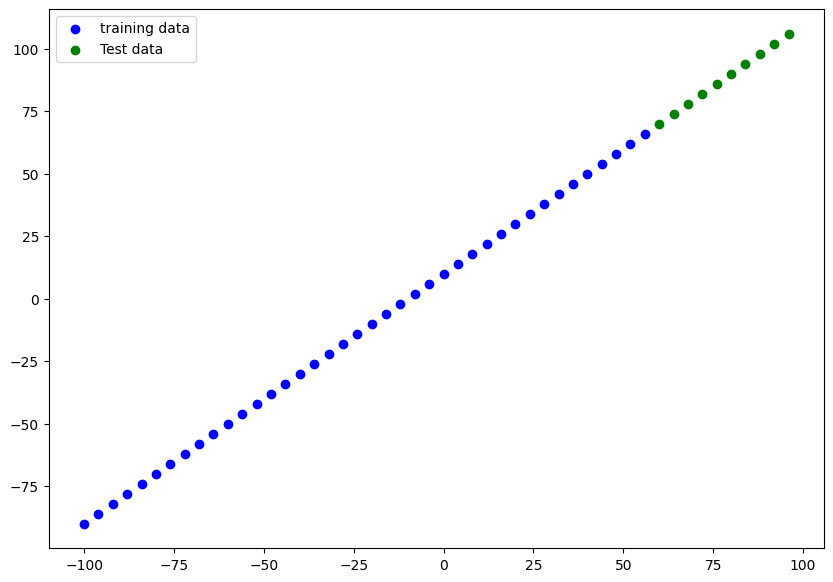

In [10]:
plt.figure(figsize=(10,7))
plt.scatter(X_train, y_train,c="b",label="training data")
plt.scatter(X_test, y_test, c="g",label="Test data")
plt.legend();

In [11]:
tf.random.set_seed(42)

model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(1,input_shape = [1]))

model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = 0.01),
             loss = tf.keras.losses.mse,
             metrics = ["mse"])


In [12]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 1)                 2         
                                                                 
Total params: 2 (8.00 Byte)
Trainable params: 2 (8.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


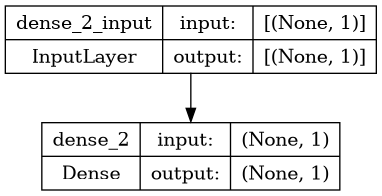

In [13]:
plot_model(model, show_shapes = True)

In [14]:
model.fit(X_train, y_train, epochs = 100)

Epoch 1/100
2/2 [==============================] - 0s 10ms/step - loss: 17922.7812 - mse: 17922.7812
Epoch 2/100
2/2 [==============================] - 0s 7ms/step - loss: 17644.9219 - mse: 17644.9219
Epoch 3/100
2/2 [==============================] - 0s 5ms/step - loss: 17376.2305 - mse: 17376.2305
Epoch 4/100
2/2 [==============================] - 0s 5ms/step - loss: 17106.1992 - mse: 17106.1992
Epoch 5/100
2/2 [==============================] - 0s 5ms/step - loss: 16847.9805 - mse: 16847.9805
Epoch 6/100
2/2 [==============================] - 0s 5ms/step - loss: 16585.0137 - mse: 16585.0137
Epoch 7/100
2/2 [==============================] - 0s 5ms/step - loss: 16323.4092 - mse: 16323.4092
Epoch 8/100
2/2 [==============================] - 0s 6ms/step - loss: 16047.4160 - mse: 16047.4160
Epoch 9/100
2/2 [==============================] - 0s 5ms/step - loss: 15811.0752 - mse: 15811.0752
Epoch 10/100
2/2 [==============================] - 0s 6ms/step - loss: 15564.1895 - mse: 15564.189

In [15]:
y_preds = model.predict(X_test)
y_preds

1/1 [==============================] - 0s 50ms/step


array([[ -7.2685456],
       [ -7.6655717],
       [ -8.062597 ],
       [ -8.459623 ],
       [ -8.856649 ],
       [ -9.253675 ],
       [ -9.6507015],
       [-10.047728 ],
       [-10.444754 ],
       [-10.84178  ]], dtype=float32)

In [16]:
def plot_predictions(train_data = X_train,
                    train_label = y_train,
                    test_data = X_test,
                    test_label = y_test,
                    predictions = y_preds):
    plt.figure(figsize = [10,7])
    plt.scatter(train_data, train_label, c="b", label="training data")
    plt.scatter(test_data, test_label, c="g", label="testing data")
    plt.scatter(test_data, predictions, c="r", label="predictions")
    plt.legend();

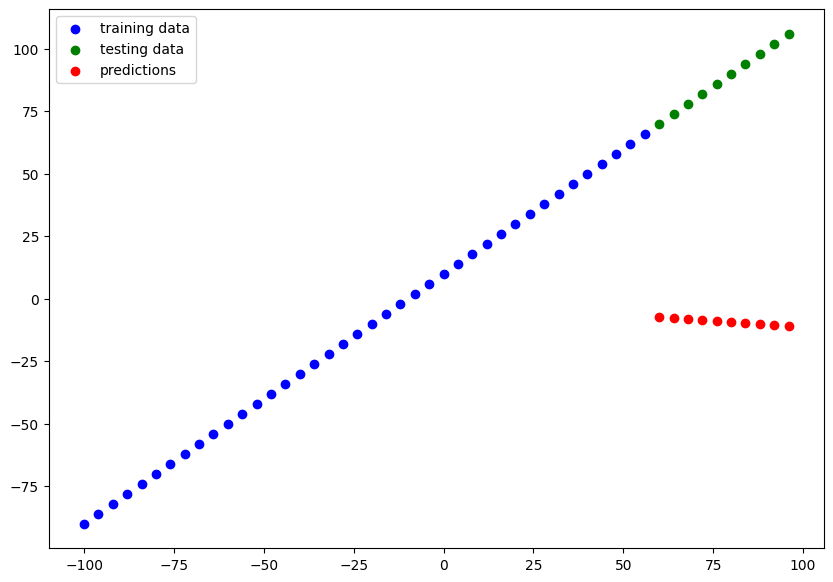

In [17]:
plot_predictions(train_data = X_train,
                    train_label = y_train,
                    test_data = X_test,
                    test_label = y_test,
                    predictions = y_preds)

In [18]:
tf.random.set_seed(42)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(50, input_shape = [1], name = "input_layer"),
    tf.keras.layers.Dense(100, input_shape = [1], name = "hidden_layer_1"),
    tf.keras.layers.Dense(20, input_shape = [1], name = "hidden_layer_2"),
    tf.keras.layers.Dense(1, name = "output_layer")
])

model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = 0.01),
             loss = tf.keras.losses.mse,
             metrics = ["mse"])

In [19]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 50)                100       
                                                                 
 hidden_layer_1 (Dense)      (None, 100)               5100      
                                                                 
 hidden_layer_2 (Dense)      (None, 20)                2020      
                                                                 
 output_layer (Dense)        (None, 1)                 21        
                                                                 
Total params: 7241 (28.29 KB)
Trainable params: 7241 (28.29 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


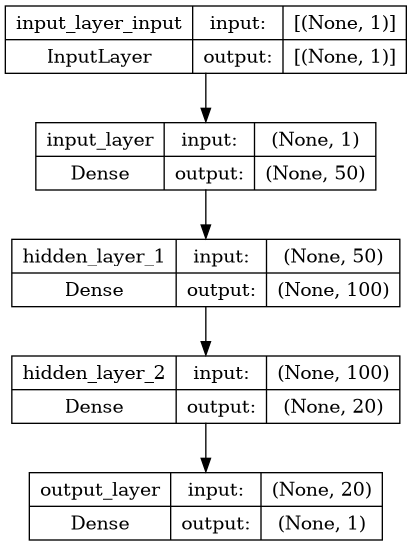

In [20]:
plot_model(model, show_shapes = True)

In [21]:
model.fit(X_train, y_train, epochs = 100)

Epoch 1/100
2/2 [==============================] - 1s 10ms/step - loss: 3087.6675 - mse: 3087.6675
Epoch 2/100
2/2 [==============================] - 0s 8ms/step - loss: 962.6595 - mse: 962.6595
Epoch 3/100
2/2 [==============================] - 0s 5ms/step - loss: 884.1147 - mse: 884.1147
Epoch 4/100
2/2 [==============================] - 0s 7ms/step - loss: 522.5558 - mse: 522.5558
Epoch 5/100
2/2 [==============================] - 0s 6ms/step - loss: 121.3838 - mse: 121.3838
Epoch 6/100
2/2 [==============================] - 0s 6ms/step - loss: 542.7830 - mse: 542.7830
Epoch 7/100
2/2 [==============================] - 0s 7ms/step - loss: 208.0360 - mse: 208.0360
Epoch 8/100
2/2 [==============================] - 0s 5ms/step - loss: 111.8776 - mse: 111.8776
Epoch 9/100
2/2 [==============================] - 0s 6ms/step - loss: 237.0972 - mse: 237.0972
Epoch 10/100
2/2 [==============================] - 0s 6ms/step - loss: 178.8366 - mse: 178.8366
Epoch 11/100
2/2 [==================

In [22]:
y_preds = model.predict(X_test)
y_preds

1/1 [==============================] - 0s 71ms/step


array([[ 70.00506 ],
       [ 74.005104],
       [ 78.00512 ],
       [ 82.005165],
       [ 86.00518 ],
       [ 90.00522 ],
       [ 94.00523 ],
       [ 98.00528 ],
       [102.0053  ],
       [106.00533 ]], dtype=float32)

In [23]:
def plot_predictions(train_data = X_train,
                    train_label = y_train,
                    test_data = X_test,
                    test_label = y_test,
                    predictions = y_preds):
    plt.figure(figsize = [10,7])
    plt.scatter(train_data, train_label, c="b", label="training data")
    plt.scatter(test_data, test_label, c="g", label="testing data")
    plt.scatter(test_data, predictions, c="r", label="predictions")
    plt.legend();

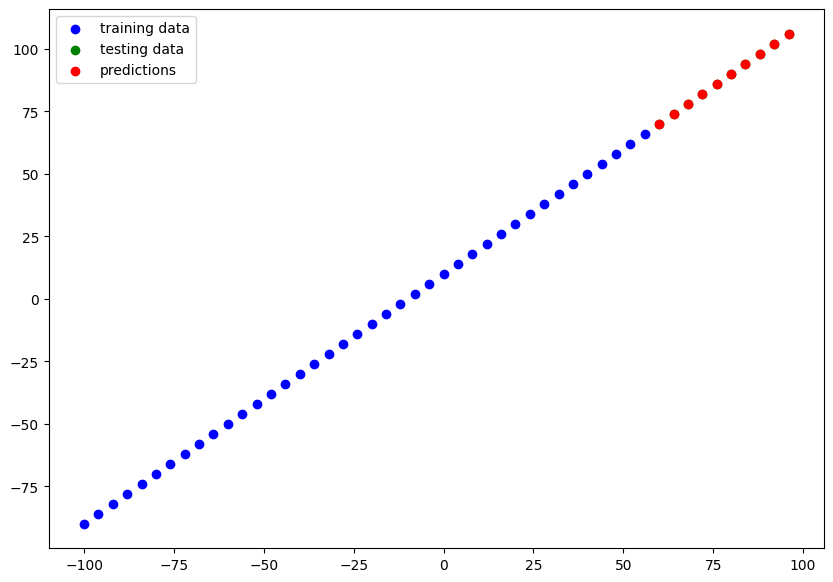

In [24]:
plot_predictions(train_data = X_train,
                    train_label = y_train,
                    test_data = X_test,
                    test_label = y_test,
                    predictions = y_preds)